<a href="https://colab.research.google.com/github/Ganesh-2250/Computer_Vision/blob/main/CV_Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment - 2

```
T Ganesh
24B2250
```



STEP 1

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn.functional as F

STEP 2

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


Device: cuda


STEP 3

In [9]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


STEP 4

In [10]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


STEP 5

In [11]:
model_ann = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ann.parameters(), lr=0.001)


STEP 6

In [12]:
num_epochs = 5
ls_losses = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model_ann(images)
        loss = criterion(outputs, labels)
        ls_losses.append(loss.item())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")


Epoch [1/5], Step [100/782], Loss: 1.8299
Epoch [1/5], Step [200/782], Loss: 1.6845
Epoch [1/5], Step [300/782], Loss: 1.6393
Epoch [1/5], Step [400/782], Loss: 1.6481
Epoch [1/5], Step [500/782], Loss: 1.5756
Epoch [1/5], Step [600/782], Loss: 1.5059
Epoch [1/5], Step [700/782], Loss: 1.4376
Epoch [2/5], Step [100/782], Loss: 1.2058
Epoch [2/5], Step [200/782], Loss: 1.5521
Epoch [2/5], Step [300/782], Loss: 1.4272
Epoch [2/5], Step [400/782], Loss: 1.5273
Epoch [2/5], Step [500/782], Loss: 1.4676
Epoch [2/5], Step [600/782], Loss: 1.6426
Epoch [2/5], Step [700/782], Loss: 1.2920
Epoch [3/5], Step [100/782], Loss: 1.5002
Epoch [3/5], Step [200/782], Loss: 1.2499
Epoch [3/5], Step [300/782], Loss: 1.2899
Epoch [3/5], Step [400/782], Loss: 1.2647
Epoch [3/5], Step [500/782], Loss: 1.3918
Epoch [3/5], Step [600/782], Loss: 1.2588
Epoch [3/5], Step [700/782], Loss: 1.2273
Epoch [4/5], Step [100/782], Loss: 1.4162
Epoch [4/5], Step [200/782], Loss: 1.2481
Epoch [4/5], Step [300/782], Loss:

STEP 7

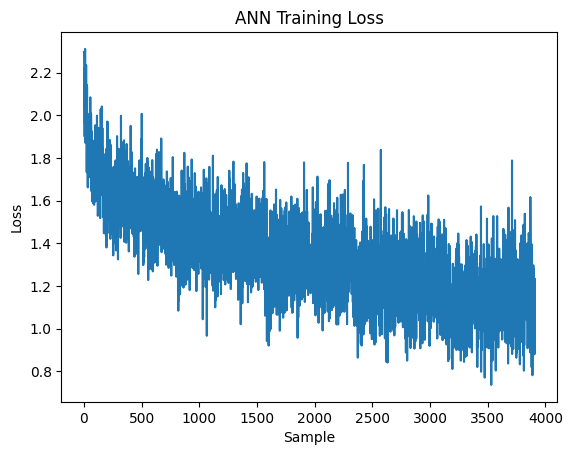

In [13]:
x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel("Sample")
plt.ylabel("Loss")
plt.title("ANN Training Loss")
plt.show()


STEP 8

ANN Accuracy: 0.5328
ANN Precision: 0.5387
ANN Recall: 0.5328
ANN F1-Score: 0.5331


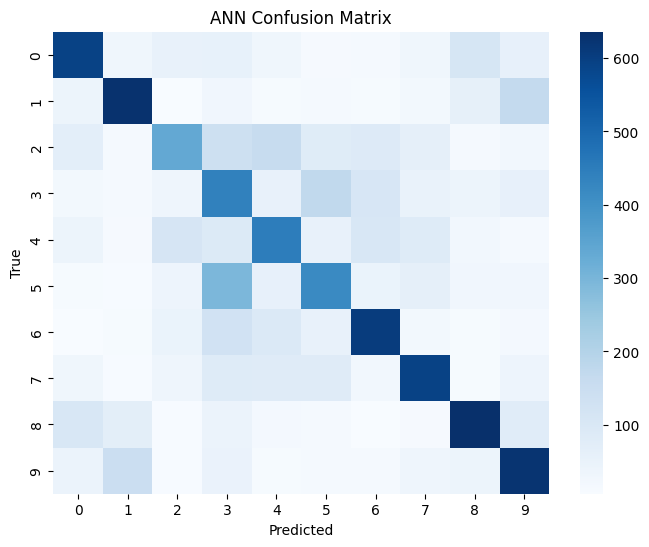

In [14]:
model_ann.eval()
all_preds_ann, all_labels_ann = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_ann(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds_ann.extend(predicted.cpu().numpy())
        all_labels_ann.extend(labels.cpu().numpy())

accuracy_ann = accuracy_score(all_labels_ann, all_preds_ann)
precision_ann = precision_score(all_labels_ann, all_preds_ann, average='macro')
recall_ann = recall_score(all_labels_ann, all_preds_ann, average='macro')
f1_ann = f1_score(all_labels_ann, all_preds_ann, average='macro')

print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(f"ANN Precision: {precision_ann:.4f}")
print(f"ANN Recall: {recall_ann:.4f}")
print(f"ANN F1-Score: {f1_ann:.4f}")

# Confusion matrix visualization
cm_ann = confusion_matrix(all_labels_ann, all_preds_ann)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=False, cmap='Blues')
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


STEP 9

In [15]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


STEP 10

In [16]:
model_cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_cnn(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")


Epoch [1/5], Step [100/782], Loss: 1.6959
Epoch [1/5], Step [200/782], Loss: 1.2994
Epoch [1/5], Step [300/782], Loss: 1.2515
Epoch [1/5], Step [400/782], Loss: 1.1159
Epoch [1/5], Step [500/782], Loss: 1.1158
Epoch [1/5], Step [600/782], Loss: 1.1476
Epoch [1/5], Step [700/782], Loss: 1.1163
Epoch [2/5], Step [100/782], Loss: 0.7628
Epoch [2/5], Step [200/782], Loss: 0.9673
Epoch [2/5], Step [300/782], Loss: 0.9211
Epoch [2/5], Step [400/782], Loss: 1.0968
Epoch [2/5], Step [500/782], Loss: 0.8375
Epoch [2/5], Step [600/782], Loss: 0.7627
Epoch [2/5], Step [700/782], Loss: 0.8644
Epoch [3/5], Step [100/782], Loss: 0.4824
Epoch [3/5], Step [200/782], Loss: 0.6897
Epoch [3/5], Step [300/782], Loss: 0.8080
Epoch [3/5], Step [400/782], Loss: 0.4461
Epoch [3/5], Step [500/782], Loss: 0.7145
Epoch [3/5], Step [600/782], Loss: 0.5648
Epoch [3/5], Step [700/782], Loss: 0.5043
Epoch [4/5], Step [100/782], Loss: 0.5373
Epoch [4/5], Step [200/782], Loss: 0.5230
Epoch [4/5], Step [300/782], Loss:

STEP 11

CNN Accuracy: 0.7304
CNN Precision: 0.7334
CNN Recall: 0.7304
CNN F1-Score: 0.7291


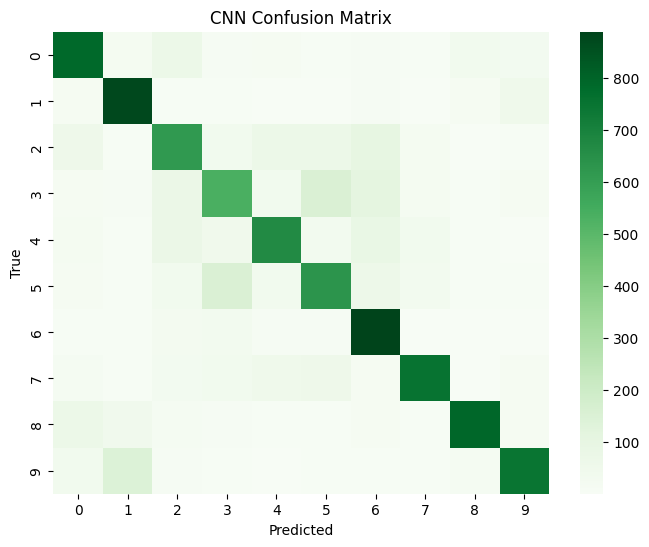

In [17]:
model_cnn.eval()
all_preds_cnn, all_labels_cnn = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds_cnn.extend(predicted.cpu().numpy())
        all_labels_cnn.extend(labels.cpu().numpy())

accuracy_cnn = accuracy_score(all_labels_cnn, all_preds_cnn)
precision_cnn = precision_score(all_labels_cnn, all_preds_cnn, average='macro')
recall_cnn = recall_score(all_labels_cnn, all_preds_cnn, average='macro')
f1_cnn = f1_score(all_labels_cnn, all_preds_cnn, average='macro')

print(f"CNN Accuracy: {accuracy_cnn:.4f}")
print(f"CNN Precision: {precision_cnn:.4f}")
print(f"CNN Recall: {recall_cnn:.4f}")
print(f"CNN F1-Score: {f1_cnn:.4f}")

cm_cnn = confusion_matrix(all_labels_cnn, all_preds_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=False, cmap='Greens')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


STEP 12

In [18]:
data = {
    'Model': ['ANN', 'CNN'],
    'Accuracy': [accuracy_ann, accuracy_cnn],
    'Precision': [precision_ann, precision_cnn],
    'Recall': [recall_ann, recall_cnn],
    'F1-Score': [f1_ann, f1_cnn]
}

df_comparison = pd.DataFrame(data)
print(df_comparison)


  Model  Accuracy  Precision  Recall  F1-Score
0   ANN    0.5328   0.538718  0.5328  0.533108
1   CNN    0.7304   0.733445  0.7304  0.729089


STEP 13

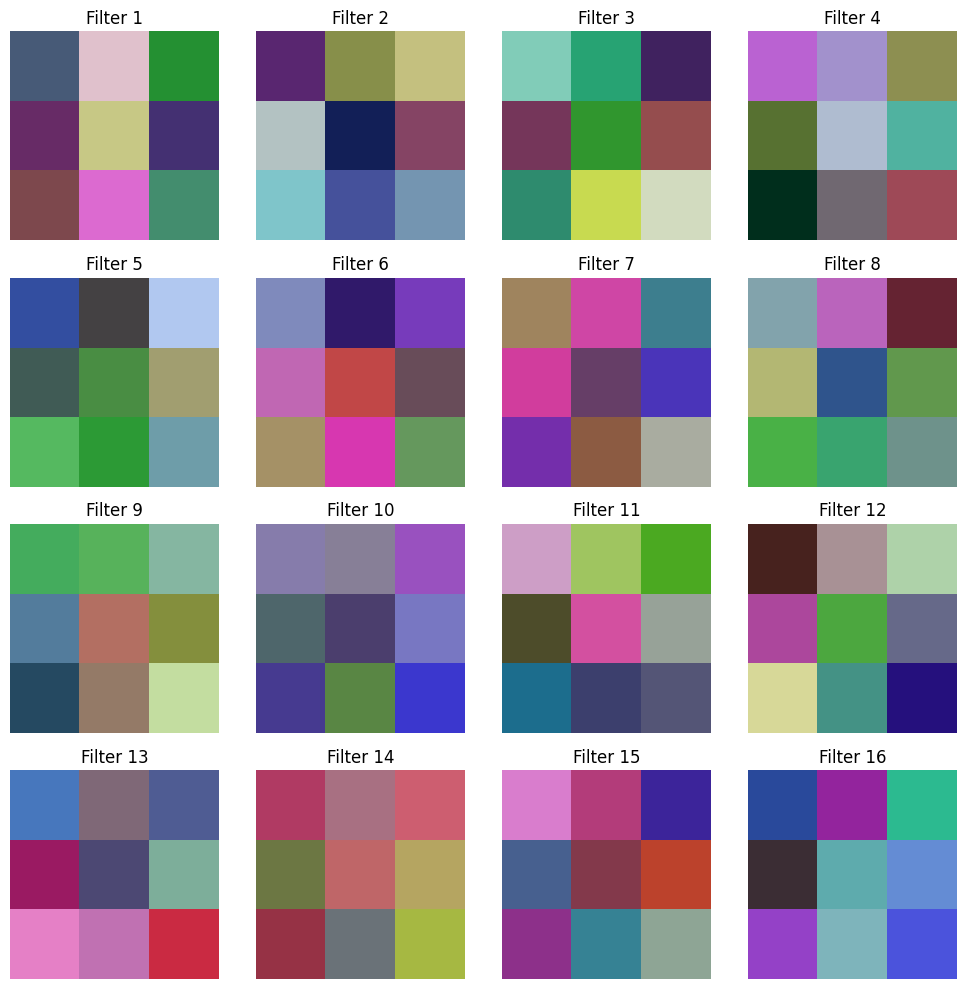

In [19]:
first_conv_layer_weights = model_cnn.conv1.weight.data.cpu().numpy()
min_w = first_conv_layer_weights.min()
max_w = first_conv_layer_weights.max()
first_conv_layer_weights = (first_conv_layer_weights - min_w) / (max_w - min_w)

num_filters = first_conv_layer_weights.shape[0]
num_plots = min(num_filters, 16)
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.flatten()

for i in range(num_plots):
    filter_img = np.transpose(first_conv_layer_weights[i], (1, 2, 0))
    axes[i].imshow(filter_img)
    axes[i].set_title(f'Filter {i+1}')
    axes[i].axis('off')

for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


STEP 14

In [20]:
train_transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset_augmented = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform_augmented)
train_loader_augmented = DataLoader(dataset=train_dataset_augmented, batch_size=64, shuffle=True)

model_cnn_augmented = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer_augmented = optim.Adam(model_cnn_augmented.parameters(), lr=0.001)

print("Training CNN with Data Augmentation...")

num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader_augmented):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_cnn_augmented(images)
        loss = criterion(outputs, labels)
        optimizer_augmented.zero_grad()
        loss.backward()
        optimizer_augmented.step()
        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader_augmented)}], Loss: {loss.item():.4f}")


Training CNN with Data Augmentation...
Epoch [1/5], Step [100/782], Loss: 1.8575
Epoch [1/5], Step [200/782], Loss: 1.3792
Epoch [1/5], Step [300/782], Loss: 1.5498
Epoch [1/5], Step [400/782], Loss: 1.4551
Epoch [1/5], Step [500/782], Loss: 1.3920
Epoch [1/5], Step [600/782], Loss: 1.1055
Epoch [1/5], Step [700/782], Loss: 1.2147
Epoch [2/5], Step [100/782], Loss: 1.2237
Epoch [2/5], Step [200/782], Loss: 1.4398
Epoch [2/5], Step [300/782], Loss: 1.1427
Epoch [2/5], Step [400/782], Loss: 1.0519
Epoch [2/5], Step [500/782], Loss: 1.2329
Epoch [2/5], Step [600/782], Loss: 1.1085
Epoch [2/5], Step [700/782], Loss: 1.2375
Epoch [3/5], Step [100/782], Loss: 0.9779
Epoch [3/5], Step [200/782], Loss: 0.9553
Epoch [3/5], Step [300/782], Loss: 1.3052
Epoch [3/5], Step [400/782], Loss: 0.9797
Epoch [3/5], Step [500/782], Loss: 0.8775
Epoch [3/5], Step [600/782], Loss: 0.9897
Epoch [3/5], Step [700/782], Loss: 1.0858
Epoch [4/5], Step [100/782], Loss: 0.9890
Epoch [4/5], Step [200/782], Loss: 1.

STEP 15

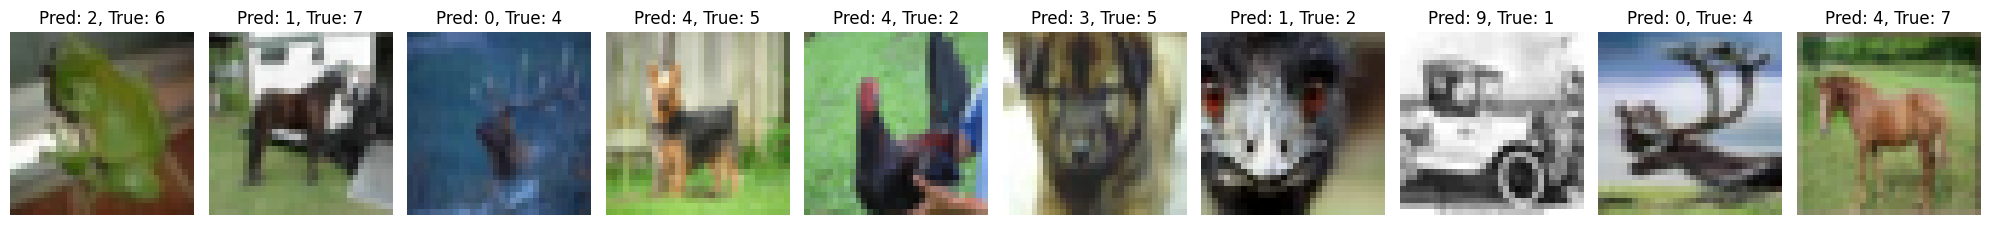

In [21]:
model_to_evaluate = model_cnn_augmented if model_cnn_augmented else model_cnn
model_to_evaluate.eval()

incorrect_preds, incorrect_labels, incorrect_images = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images_cpu = images.cpu()
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_to_evaluate(images)
        _, predicted = torch.max(outputs.data, 1)

        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                incorrect_preds.append(predicted[i].item())
                incorrect_labels.append(labels[i].item())
                img = images_cpu[i].numpy().transpose((1, 2, 0))
                img = 0.5 * img + 0.5  # Denormalize
                img = np.clip(img, 0, 1)
                incorrect_images.append(img)

num_to_display = min(len(incorrect_images), 10)
fig, axes = plt.subplots(1, num_to_display, figsize=(20, 4))
for i in range(num_to_display):
    axes[i].imshow(incorrect_images[i])
    axes[i].set_title(f'Pred: {incorrect_preds[i]}, True: {incorrect_labels[i]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()
